# TP2 - ADM

**Louis COUPPIÉ, Adrien BERTRAND**

In [50]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')

### Question 1

In [51]:
data = pd.read_csv('../data/villes.csv', sep=';', header=0)
print(data.head(3))

X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

  ville  janv  fev  mars  avril   mai  juin  juil  aout  sept   oct   nov  dec
0  ajac   7.7  8.7  10.5   12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8  8.7
1  ange   4.2  4.9   7.9   10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6  4.9
2  ango   4.6  5.4   8.9   11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1  5.3


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
print(X_pca)


[[ 1.63835106  1.78748032  1.35686597  1.16748094  1.09413658  1.2081338
   1.11734499  1.39767179  1.73963204  1.93208186  1.82836605  1.68024825]
 [ 0.116831    0.05000944 -0.1285452  -0.32148026 -0.52942092 -0.42704427
  -0.5237069  -0.53585369 -0.41130215 -0.27258829 -0.12654562  0.04961627]
 [ 0.29071901  0.27862403  0.44276679  0.28764023  0.10588418 -0.31024584
  -0.12587614 -0.0270312  -0.0016004   0.1108326   0.10618196  0.22126174]
 [-1.23080105 -1.18450934 -0.98551318 -0.79524064 -0.52942092 -0.48544349
  -0.5237069  -0.58673594 -0.71857846 -0.89564725 -1.01091043 -1.1948134 ]
 [ 1.59487906  1.4674199   1.52825957  0.76140061  0.2470631   0.04014946
  -0.02641845  0.22738005  0.8178031   1.21316768  1.40945641  1.46569141]
 [ 0.72543903  0.82729905  1.24260358  1.30284105  1.02354712  0.91613772
   0.57032769  0.7870848   0.86901582  0.73389156  0.57163712  0.60746405]
 [ 0.94279904  0.4615157  -0.1856764  -1.13364091 -1.94121006 -1.94542391
  -2.06530111 -1.75702768 -1.1282

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
clustering = kmeans.predict(X)
print(clustering)

[1 0 0 2 1 1 0 2 2 2 2 2 2 2 1 1 2 0 1 1 2 0 1 2 0 2 2 2 1 0 0 2]


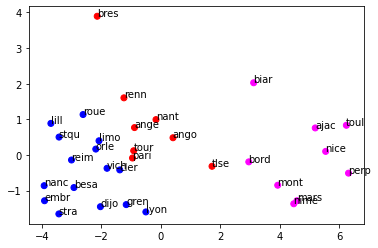

In [54]:
colors = ['red','magenta','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Question 2

In [55]:
from sklearn.cluster import AgglomerativeClustering

aggl1 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
aggl2 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
aggl3 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
clustering_ward = aggl1.labels_
clustering_average = aggl2.labels_
clustering_single = aggl3.labels_

In [62]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

def dendrogram_plot(linkage_type):
    linked = linkage(X, linkage_type)
    # print(linked)
    labelList = range(1, 11)
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.show()

#### Analyse des différentes méthodes

Ward :


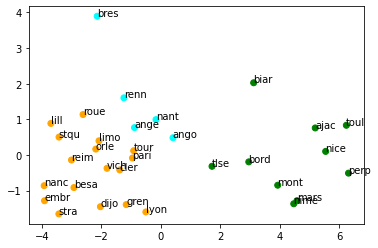

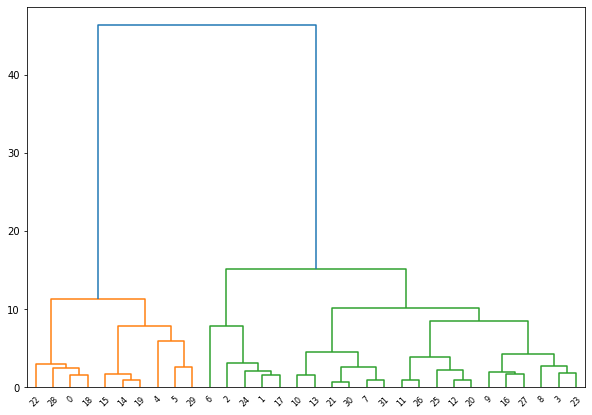

In [64]:
colors = ['green','orange','cyan']
print("Ward :")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

dendrogram_plot('ward')

average

Average :


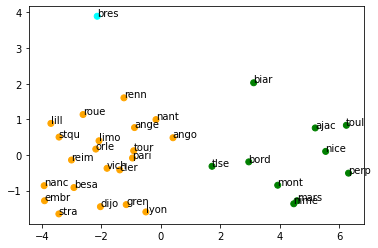

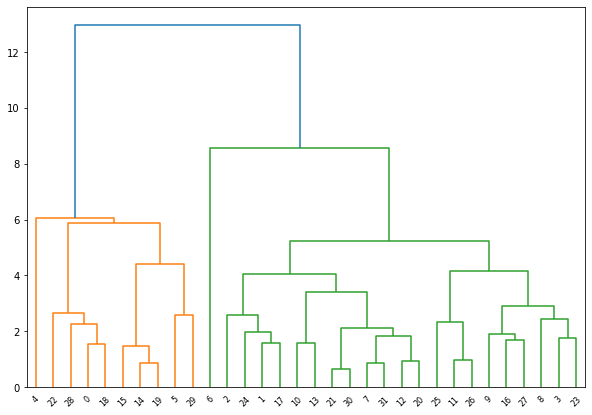

In [65]:
print("Average :")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

dendrogram_plot('average')

single

Single :


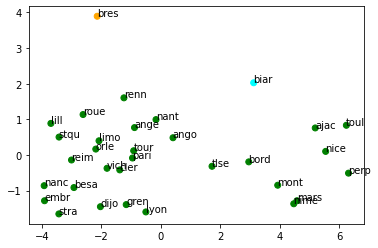

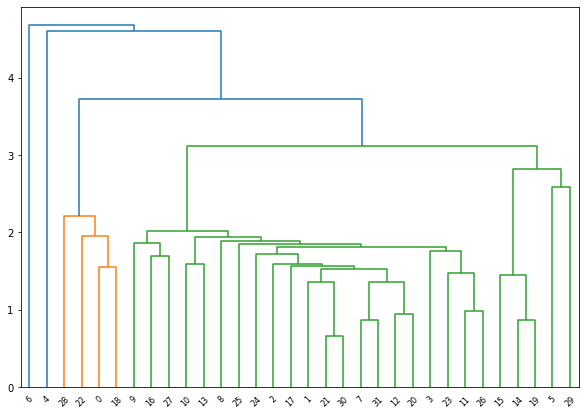

In [63]:
print("Single :")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_single, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

dendrogram_plot('single')

Le résultat obtenu est assez logique car l'algorithme prend à chaque itération la distance minimum entre deux entités. Ainsi, les villes (ou groupement de villes) les plus proches entre elles vont être regroupées ensemble. De ce fait, Brest et Biarritz sont isolées par rapport aux autres villes, et vont ainsi être regroupées en dernier. Comme nous avons choisi 3 clusters, elles se retrouvent dans des clusters qui leurs sont propres. Si nous avions fixé le nombre de clusters à 2, Biarritz aurait été ajoutée au cluster vert car c'est elle la plus proche.

### Question 3

In [76]:
from sklearn.metrics import silhouette_score

for i in range(5):
    print(i+2, " clusters :")
    kmeans = KMeans(n_clusters=i+2).fit(X)
    print(silhouette_score(X, kmeans.labels_))
    print()

2  clusters :
0.6181156437258204

3  clusters :
0.40912000832289414

4  clusters :
0.3607157286251509

5  clusters :
0.32955042925705946

6  clusters :
0.32353332959101677



On constate que pour le K-Means, le nombre optimal de cluster est 2.

### Question 4

In [75]:
for i in range(5):
    print(i+2, " clusters :")
    aggl1 = AgglomerativeClustering(n_clusters=i+2, linkage='ward').fit(X)
    aggl2 = AgglomerativeClustering(n_clusters=i+2, linkage='average').fit(X)
    aggl3 = AgglomerativeClustering(n_clusters=i+2, linkage='single').fit(X)
    print("Ward :", silhouette_score(X, aggl1.labels_))
    print("Average:", silhouette_score(X, aggl2.labels_))
    print("Single:", silhouette_score(X, aggl3.labels_))
    print()

2  clusters :
Ward : 0.6181156437258204
Average: 0.6181156437258204
Single: 0.1659695866896086

3  clusters :
Ward : 0.40631332038912676
Average: 0.4917281366704161
Single: -0.022192344588323108

4  clusters :
Ward : 0.37021214316483475
Average: 0.36861954798474894
Single: 0.2055811051264108

5  clusters :
Ward : 0.30023191694199747
Average: 0.42406035169671513
Single: 0.42406035169671513

6  clusters :
Ward : 0.3209475599474183
Average: 0.3433994436353735
Single: 0.41263436789763763



On constate que pour les méthodes de type *ward* et *average*,  le nombre de clusters optimal est 2. Cependant, la méthode de type *single* est optimal à 5 clusters.

### Question 5

Avec les valeurs du critère "Silouhette Index" des question précédente, pour 3 clusters, la meilleure méthode est la méthode *average* avec un "Silouhette Index" de ```0.4917281366704161```.